# Matrix Multiplication

In [1]:
import numpy as np
from matplotlib import pyplot as plt
COUNT = 0

In [2]:
def matrix_multiplication(A, B):
  n = len(A)
  C = np.zeros((n, n))
  
  for i in range(n):
    for j in range(n):
      for k in range(n):
        C[i][j] += A[i][k] * B[k][j]
        global COUNT; COUNT += 1

  return C

In [3]:

def matrix_multiplication_dq(A, B):
  
  n = A.shape[0]
  m = n // 2
  global COUNT; COUNT += n**2

  if A.size == 1 or B.size == 1:
    return A * B

  # Divide A and B into n/2-sized matrixes
  a = A[:m, :m]
  b = A[:m, m:]
  c = A[m:, :m]
  d = A[m:, m:]
  e = B[:m, :m]
  f = B[:m, m:]
  g = B[m:, :m]
  h = B[m:, m:]
  
  # Recursively multiply 
  p1 = matrix_multiplication_dq(a, e)
  p2 = matrix_multiplication_dq(b, g)
  p3 = matrix_multiplication_dq(a, f)
  p4 = matrix_multiplication_dq(b, h)
  p5 = matrix_multiplication_dq(c, e)
  p6 = matrix_multiplication_dq(d, g)
  p7 = matrix_multiplication_dq(c, f)
  p8 = matrix_multiplication_dq(d, h)
  
  # Build result matrix
  C = np.zeros((n, n))
  C[:m, :m] = p1 + p2
  C[:m, m:] = p3 + p4
  C[m:, :m] = p5 + p6
  C[m:, m:] = p7 + p8

  return C

In [4]:

# source: https://www.interviewbit.com/blog/strassens-matrix-multiplication/

def strassen_algorithm(A, B):
  
  n = A.shape[0]
  m = n // 2
  global COUNT; COUNT += n**2

  if A.size == 1 or B.size == 1:
    return A * B

  # Divide A and B into n/2-sized matrixes
  a = A[:m, :m]
  b = A[:m, m:]
  c = A[m:, :m]
  d = A[m:, m:]
  e = B[:m, :m]
  f = B[:m, m:]
  g = B[m:, :m]
  h = B[m:, m:]
  
  # Recursively multiply 
  p1 = strassen_algorithm(a, f - h)
  p2 = strassen_algorithm(a + b, h)
  p3 = strassen_algorithm(c + d, e)
  p4 = strassen_algorithm(d, g - e)
  p5 = strassen_algorithm(a + d, e + h)
  p6 = strassen_algorithm(b - d, g + h)
  p7 = strassen_algorithm(a - c, e + f)
  
  # Build result matrix
  C = np.zeros((n, n))
  C[:m, :m] = p5 + p4 - p2 + p6
  C[:m, m:] = p1 + p2
  C[m:, :m] = p3 + p4
  C[m:, m:] = p1 + p5 - p3 - p7

  return C

In [5]:
x = np.array([
  [1, 2, 3, 4],
  [2, 3, 4, 3],
  [3, 4, 3, 2],
  [4, 3, 2, 1],
])
y = np.array([
  [-1, 0, 0, 0],
  [0, -1, 0, 0],
  [0, 0, -1, 0],
  [0, 0, 0, -1]
])
print('x * y =')
print(matrix_multiplication(x, y), end="\n\n")
print(matrix_multiplication_dq(x, y), end="\n\n")
print(strassen_algorithm(x, y), end="\n\n")

x * y =
[[-1. -2. -3. -4.]
 [-2. -3. -4. -3.]
 [-3. -4. -3. -2.]
 [-4. -3. -2. -1.]]

[[-1. -2. -3. -4.]
 [-2. -3. -4. -3.]
 [-3. -4. -3. -2.]
 [-4. -3. -2. -1.]]

[[-1. -2. -3. -4.]
 [-2. -3. -4. -3.]
 [-3. -4. -3. -2.]
 [-4. -3. -2. -1.]]



In [6]:

axis_n = []
axis_standard = []
axis_dq = []
axis_strassen = []

for n in [2**x for x in range(2, 8)]:
  A = np.random.randint(0, 10, (n, n))
  B = np.random.randint(0, 10, (n, n))
  
  axis_n.append(n)

  COUNT = 0
  _ = matrix_multiplication(A, B)
  axis_standard.append(COUNT)

  COUNT = 0
  _ = matrix_multiplication_dq(A, B)
  axis_dq.append(COUNT) 

  COUNT = 0
  _ = strassen_algorithm(A, B)
  axis_strassen.append(COUNT)
  

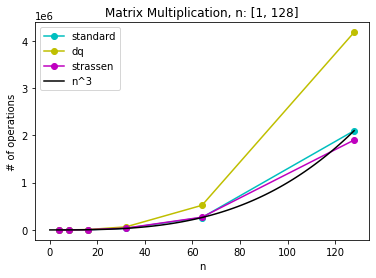

In [7]:
axis_smooth = np.linspace(0, axis_n[-1], 100)
plt.plot(axis_n, axis_standard, 'co-', label="standard")
plt.plot(axis_n, axis_dq, 'yo-', label="dq")
plt.plot(axis_n, axis_strassen, 'mo-', label="strassen")
plt.plot(axis_smooth, axis_smooth**3, 'k-', label="n^3")
plt.xlabel("n")
plt.ylabel("# of operations")
plt.title(f"Matrix Multiplication, n: [1, {axis_n[-1]}]")
plt.legend()
plt.show()